# $\color{purple}{\text{PIL or Python Imaging Library}}$

![logo](https://pillow.readthedocs.io/en/stable/_static/pillow-logo.png)

A biblioteca PIL é uma biblioteca de processamento de imagens em Python. Ela fornece uma ampla gama de funcionalidades para abrir, manipular e salvar diferentes tipos de arquivos de imagem.

> Originalmente desenvolvida por Fredrik Lundh em 1995, a PIL tornou-se uma das bibliotecas de processamento de imagens mais populares em Python. No entanto, a versão original da PIL foi descontinuada e a última versão estável foi lançada em 2011. Desde então, a comunidade de desenvolvedores Python adotou uma bifurcação da PIL chamada Pillow.

> O Pillow é um fork amigável e compatível com a PIL, mantendo muitas das mesmas interfaces e funcionalidades. É a biblioteca recomendada para trabalhar com imagens em Python atualmente. A biblioteca Pillow suporta uma variedade de formatos de imagem, incluindo os formatos mais comuns, como JPEG, PNG, GIF, BMP e TIFF.

Com o Pillow, você pode abrir uma imagem, realizar manipulações nela, como redimensionar, cortar, girar e aplicar filtros. Você também pode adicionar texto, desenhar formas e trabalhar com camadas. Além disso, o Pillow fornece suporte para processamento de imagem de baixo nível, permitindo acesso direto aos pixels individuais e a aplicação de operações personalizadas.


#### $\color{red}{\text{OBS: A biblioteca Matplotlib apenas foi usada para exibição das imagens no Notebook para melhor entendiment visual da biblioteca PIL e suas funções}}$

### Usando a classe `imagem`

A classe mais importante na PIL é a classe `Image`, definida no módulo com o mesmo nome. Podemos criar instâncias dessa classe de várias maneiras; seja carregando imagens de arquivos, processando outras imagens ou criando imagens do zero.

Para carregar uma imagem de um arquivo, use a função `open()`

In [19]:
from PIL import Image
img = Image.open("predios.jpg")

O atributo **format** identifica a origem de uma imagem. Se a imagem não foi lida de um arquivo, ela é definida como Null. O atributo **size** é uma tupla de 2 contendo largura e altura (em pixels). O atributo **mode** define o número e os nomes das bandas da imagem, além do tipo e profundidade do pixel.
> As bandas de uma imagem referem-se às diferentes camadas ou canais de cores que compõem uma imagem digital. Uma imagem pode ser composta por uma ou mais bandas, dependendo do modelo de cor utilizado.

>> Em um modelo de cor RGB (Red, Green, Blue), que é o mais comumente usado em imagens digitais, uma imagem é composta por três bandas: uma banda vermelha, uma banda verde e uma banda azul. Cada banda representa a intensidade da cor correspondente em cada pixel da imagem. Combinando as intensidades das três bandas, é possível criar uma ampla gama de cores.

>> Em um modelo de cor em escala de cinza, a imagem é composta por apenas uma banda, onde cada pixel representa um valor de intensidade de cinza. Esse valor varia de preto (valor mínimo) a branco (valor máximo), passando por diferentes tons de cinza.

Os modos comuns são “L” (luminância) para imagens em tons de cinza, “RGB” para imagens em cores verdadeiras e “CMYK” para imagens pré-impressão.

In [20]:
print(img.format, img.size, img.mode)

JPEG (2121, 1414) RGB


A versão padrão do **show()** não é muito eficiente, pois salva a imagem em um arquivo temporário e chama um aplicativo padrão do computador para exibir a imagem. Para exibir por este próprio meio (Jupyter ou qualquer interpretador online) precisaremos chamar a biblioteca Matplotlib.

In [21]:
img.show()

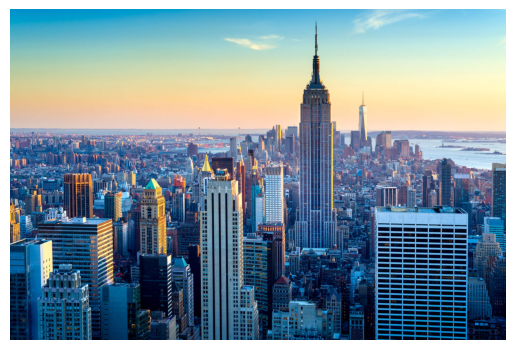

In [23]:
import matplotlib.pyplot as plt

# Abrir a imagem
imagem = Image.open("predios.jpg")

# Exibir a imagem
plt.imshow(imagem)
plt.axis('off')  # Para ocultar os eixos
plt.show()

### Cortando e Redimensionando Imagens

A classe **Image** tem dois métodos para executar essas operações `.crop()` e `.resize()`.
O argumento **.crop()** deve ser uma tupla de 4 que define as bordas esquerda, superior, direita e inferior da região que você deseja recortar. O sistema de coordenadas usado no Pillow atribui as coordenadas (0, 0) ao pixel no canto superior esquerdo. Este é o mesmo sistema de coordenadas normalmente usado para matrizes bidimensionais.

Exemplo de imagem para corte: ![image](https://files.realpython.com/media/pillow_coordinate_crop2.15af40c34f15.png)

In [24]:
cropped_img = img.crop((300, 150, 700, 1000))
cropped_img.size

cropped_img.show()

low_res_img = cropped_img.resize(
   (cropped_img.width // 4, cropped_img.height // 4)
)
low_res_img.show()

print(cropped_img.format, cropped_img.size, cropped_img.mode)

None (400, 850) RGB


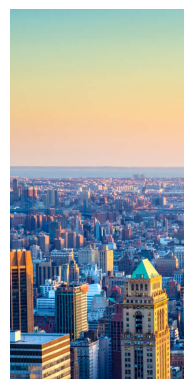

In [40]:
plt.imshow(cropped_img)
plt.axis('off')  
plt.show()

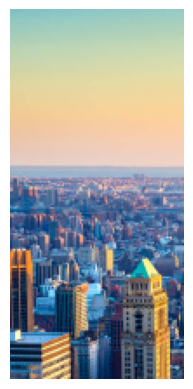

In [41]:
plt.imshow(low_res_img)
plt.axis('off')  
plt.show()

A nova imagem que **.crop()** retorna no código acima tem um tamanho de 400x850 pixels. No código acima, também é alterado a resolução da imagem recortada usando **.resize()**, que precisa de uma tupla como argumento obrigatório. A tupla que se usa como argumento define a nova largura e altura da imagem em pixels.

No exemplo acima, é definindo a nova largura e altura para um quarto deos valores originais usando o operador de floor division ( //) e os atributos `.width` e `.height`.

> Floor division
A floor division é uma operação matemática que retorna a divisão de dois números arredondada para baixo para o inteiro mais próximo. É representada pelo símbolo "//" em várias linguagens de programação, incluindo Python. A floor division difere da divisão normal ("/") no tratamento do resultado quando os números não se dividem exatamente. Enquanto a divisão normal retorna um número de ponto flutuante com a parte fracionária, a floor division descarta a parte fracionária e retorna o resultado como um número inteiro.
**EM RESUMO RETORNA UM NÚMERO INTEIRO NA DIVISÃO.**

O método **thumbnail()** da classe Image pode ser usado para redimensionar uma imagem para um tamanho máximo desejado, mantendo a proporção original da imagem. Porém, ela altera o objeto de imagem original no local, em vez de retornar um novo objeto de imagem.

Por outro lado, métodos como **crop(), resize() e reduce()** retornam um novo objeto de imagem, mantendo o objeto original intacto. Isso significa que eles aplicam as operações solicitadas, criam uma nova imagem resultante e retornam esse novo objeto de imagem.

No exemplo abaixo, o método reduce() é usado para redimensionar a imagem cropped_img para uma largura e altura divididas por 4, reduzindo a resolução da imagem em um fator de escala de 4.
Semelhante ao resize.

In [25]:
low_res_img = cropped_img.reduce(4)

E para salvar a imagem basta usar **.save()**

In [26]:
cropped_img.save("cropped_image.jpg")
low_res_img.save("low_resolution_cropped_image.jpg")

### Manipulação básica de imagem
Além de cortar e redimensionar, podemos girar ou inverter uma imagem. Para isso temos o método **.transpose()**. 

In [27]:
converted_img = img.transpose(Image.FLIP_TOP_BOTTOM)
converted_img.show()

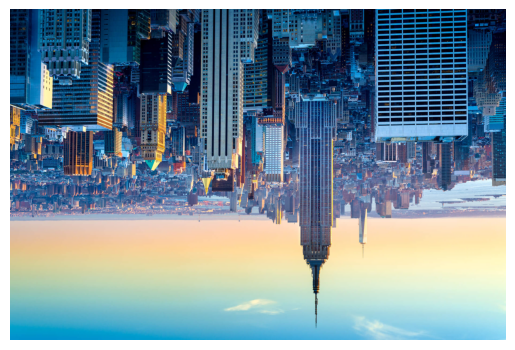

In [39]:
plt.imshow(converted_img)
plt.axis('off')  
plt.show()

Esse método tem vários argumentos possíveis:
1. **Image.FLIP_LEFT_RIGHT**: Inverte a imagem da esquerda para a direita, resultando em uma imagem espelhada
2. **Image.FLIP_TOP_BOTTOM**: Inverte a imagem de cima para baixo
3. **Image.ROTATE_90**: Gira a imagem 90 graus no sentido anti-horário
4. **Image.ROTATE_180**: Gira a imagem em 180 graus
5. **Image.ROTATE_270**: Gira a imagem 270 graus no sentido anti-horário, o que equivale a 90 graus no sentido horário
6. **Image.TRANSPOSE**: Transpõe as linhas e colunas usando o pixel superior esquerdo como origem, com o pixel superior esquerdo sendo o mesmo na imagem transposta e na imagem original
7. **Image.TRANSVERSE**: Transpõe as linhas e colunas usando o pixel inferior esquerdo como origem, sendo o pixel inferior esquerdo aquele que permanece fixo entre as versões original e modificada

Se precisar girar uma imagem em outro ângulo, poderá usar **.rotate()**:

In [34]:
rotated_img = img.rotate(45)
rotated_img.show()

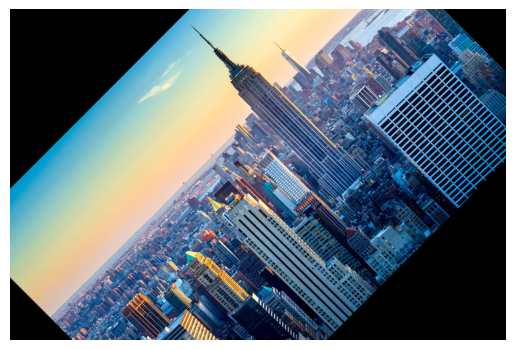

In [35]:
plt.imshow(rotated_img)
plt.axis('off')  
plt.show()

Se rodarmos o exemplo acima, verá que as bordas da imagem não aparecem na exibição, e isso pode ser alterado usando o parâmetro expand=True

In [37]:
rotated_img = img.rotate(45, expand=True)
rotated_img.show()

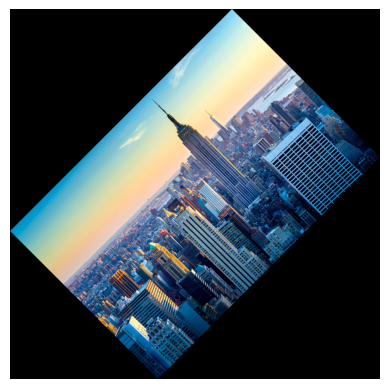

In [38]:
plt.imshow(rotated_img)
plt.axis('off')  
plt.show()

#### Para mais especifícações:
###### [Conceitos](https://pillow.readthedocs.io/en/stable/handbook/concepts.html)
###### [Tutorial](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html)
###### [Array Data Structures](https://realpython.com/python-data-structures/#array-data-structures)
###### [Module Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.reduce)